# Generalized {n,3}-gram approximate logarithmic spirals

## Set up plotting, math, and polar-to-cartesian utility functions

In [113]:
% matplotlib notebook
import matplotlib
# matplotlib.use('SVG')
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [114]:
vcos = np.vectorize(cos)
vsin = np.vectorize(sin)

In [115]:
def xyfromr(theta,r):
    return vcos(theta) * r, vsin(theta) * r

In [116]:
def thrfromxy(x, y):
    """x = array of x coordinates, y = array of y coordinates)
returns theta, r arrays"""
    r = np.array([sqrt(xx * xx + yy * yy) for xx, yy in zip(x, y)])
    th = np.array([atan2(yy, xx) for xx, yy in zip(x, y)])
    return th, r

In [117]:
@np.vectorize
def rfunc(rbase, theta_denom, angle):
    return rbase ** (min(abs(angle), twopi - angle) / theta_denom)

In [118]:
def rotate(x, y, c, s):
    return x * c - y * s, y * c + x * s

In [119]:
# Rotate theta, r coordinates by angle rot around (r,theta) point p,
# then scale the new radius
def mytwist(theta, r, rot, scale, p):
    x, y = xyfromr(theta,r)
    px, py = xyfromr(*p)
    xx, yy = rotate(x-px,y-py,cos(rot),sin(rot))
    xx += px
    yy += py
    th, rr = thrfromxy(xx,yy)
    rr *= scale
    return (th, rr)

In [120]:
def xydist(xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    return sqrt((x1-x2)**2 + (y1-y2)**2)

In [121]:
def rdist(r1, th1, r2, th2):
    return xydist(xyfromr(r1,th1), xyfromr(r2,th2))

In [122]:
def stretch(theta,r,alpha):
    xx, yy = xyfromr(theta,r)
    return(thrfromxy(xx*alpha,yy))

In [123]:
def ngramlotus(n=10,fclr='gold',bclr='teal',fw=2,bw=1):
    # n = number of sides in polygon
    plt.ion()

    polyangle = 2 * pi / n
    halfangle = pi / n
    degangle = 360 // n
    polyside = 2 * sin( halfangle )
    anglerange = int(degangle + 1)

    # radius to vertex of polygon enclosed in {n/3}
    rscaleinv = 1 - polyside**2
    rscale = 1 / rscaleinv
    nn = n // 2
    twopi = 2. * pi

    theta = np.array([pi * a / 180. for a in range(anglerange)])
    r     = np.array([1.0 for th in theta])

    plt.clf()

    # Polar plot:
    sp = plt.subplot(1, 1, 1, projection='polar')

    # Turn labels off:
    sp.grid(False)
    sp.set_xticklabels([])
    sp.set_yticklabels([])

    tc = np.array([pi * a / 180. for a in range(361)])
    rc = np.array([1.0 for t in tc])

    plt.plot(tc,rc,color=bclr,linewidth=bw)

    for j in range(nn):

        tt, rr = mytwist(theta,r,polyangle,1,(theta[0],r[0]))
        
        jangle = 2*polyangle*j 

        tt += jangle

        for i in range(nn):
            plt.plot(tt,rr,color=fclr,linewidth=fw)
            if (i < (nn-1)):
                tt += polyangle
                rr /= rscale
        
        tt = -tt

        for i in range(nn):
            plt.plot(tt,rr,color=fclr,linewidth=fw)
            if (i < (nn-1)):
                tt += polyangle
                rr *= rscale            

    for j in range(nn):

        tt, rr = mytwist(theta,r,polyangle,1,(theta[0],r[0]))
        
        jangle = 2*polyangle*j + polyangle

        tt += jangle

        for i in range(nn):
            if ( i < (nn-3)):
                plt.plot(tt,rr,color=bclr,linewidth=bw)
            elif ( i < (nn-2) ):
                plt.plot(tt,rr,color=fclr,linewidth=fw)
                
            if (i < (nn-1)):
                tt += polyangle
                rr /= rscale
        
        tt = -tt

        for i in range(nn):
            if (i > 1 and i < 3 ):
                plt.plot(tt,rr,color=fclr,linewidth=fw)
            elif ( i >= 3):
                plt.plot(tt,rr,color=bclr,linewidth=bw)
                    
            if (i < (nn-1)):
                tt += polyangle
                rr *= rscale            
                  
    # Adjust boundaries on figure
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)


<IPython.core.display.Javascript object>


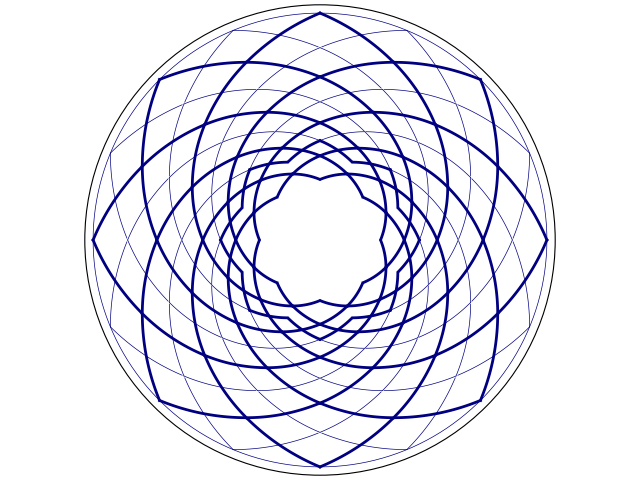

In [150]:
ngramlotus(16,fclr='navy',bclr='navy',fw=2, bw=0.5)